In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sys
sys.path.append('/tren/edrixs/scripts')
from plot import plot_image, make_theme, turbo_w
plt.rcParams['font.size'] = 7

In [2]:
yscale = 3

def plot_label(ax, count, x=0, y=1.03, color='k'):
    ax.text(x, y, count, fontdict=dict(fontsize=9, weight='bold'), transform=ax.transAxes,
            color=color, horizontalalignment='center', verticalalignment='center')

def format_cbar(cbar, lim=None, padding=0.05):
    if lim is None:
        lim = cbar.ax.get_ylim()
    cbar.outline.set_linewidth(0.5)
    cbar.ax.tick_params(which='major', width=0.5, labelright=False, length=0)
    cbar.ax.set_yticks(lim)
    cbar.set_label('Intensity (arb. units)', labelpad=10, rotation=-90)
    cbar.ax.text(0.5, -padding, lim[0], transform=cbar.ax.transAxes,
                 horizontalalignment='center', verticalalignment='center')
    cbar.ax.text(0.5, 1.+padding, lim[1], transform=cbar.ax.transAxes,
                 horizontalalignment='center', verticalalignment='center')

## Cut map

In [3]:
for scan_no in [48,49,45,41]:
    scan = dict(np.load(f'data_Ba3TaIr2O9/scan_{scan_no}.npz'))
    print(np.average(scan['Ei']))
print(11.7745-0.559)

11.2155
11.2155
11.2155
11.2155
11.2155


In [4]:
Cmap_data = []
for scan_no in [49,48,41,45]:
    scan = dict(np.load(f'data_Ba3TaIr2O9/scan_{scan_no}.npz'))
    bg = np.mean(scan['y'][np.logical_and(scan['x']>=250., scan['x']<=350.)])
    Cmap_data.append(dict(x=(scan['x']-scan['xoffset'])/1e3, y=(scan['y']-bg)/scan['ab_factor'],
                           yerr=scan['yerr']/scan['ab_factor'], HKLc=[scan['HKL'][0], scan['HKL'][1], scan['HKL'][2], scan['qc']]))

rixs = np.load('calc_Ba3TaIr2O9/rixs.npy')
Cmap_calc = []
Cmap_calc.append(dict(x=rixs[0], y=rixs[1]*yscale, Q='(-1.70, -1.10, 16.21)', qc=6))
Cmap_calc.append(dict(x=rixs[0], y=rixs[2]*yscale, Q='(-1.72, -1.08, 13.52)', qc=5))
Cmap_calc.append(dict(x=rixs[0], y=rixs[3]*yscale, Q='(-0.21, -0.31, 16.15)', qc=6))
Cmap_calc.append(dict(x=rixs[0], y=rixs[4]*yscale, Q='(-0.19, -0.33, 18.84)', qc=5))

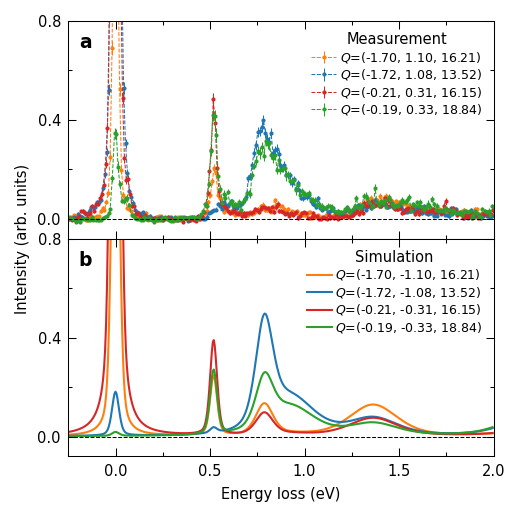

In [5]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(6.75/2,6.75/2), dpi=150,
                        gridspec_kw=dict(left=0.12, right=0.96, bottom=0.10, top=0.96, hspace=0.))

## plot
for scan1, scan2, color in zip(Cmap_data, Cmap_calc, ['C1','C0','C3','C2']):
    choose = scan1['x']<=2.
    axs[0].errorbar(scan1['x'][choose], scan1['y'][choose], scan1['yerr'][choose], fmt='o', color=color, ls='--', lw=0.5, ms=1,
                    label='$Q$=({:.2f}, {:.2f}, {:.2f})'.format(scan1['HKLc'][0], abs(scan1['HKLc'][1]), scan1['HKLc'][2]))
    choose = scan2['x']<=2.
    axs[1].plot(scan2['x'][choose], scan2['y'][choose], '-', lw=1, color=color, label='$Q$='+scan2['Q'])
    # axs[1].plot(scan2['x'][choose], scan2['y'][choose], '-', lw=1, color=color)
## format
axs[0].legend(loc='upper right', frameon=False, handletextpad=0.3, labelspacing=0.2, fontsize=6, title='Measurement')
axs[1].legend(loc='upper right', frameon=False, handletextpad=0.3, labelspacing=0.2, fontsize=6, title='Simulation')
for ax in axs:
    make_theme(ax, ticklength=4)
    ax.axhline(y=0., ls='--', lw=0.5, color='k', zorder=100)
axs[0].set_xlim(-0.25, 2.)
axs[0].set_xticks(np.arange(0.,2.01,0.5))
axs[0].set_ylim(-0.08,0.6)
axs[0].set_yticks(np.arange(0.,1.01,0.4))
axs[1].set_xlabel('Energy loss (eV)')
axs[0].set_ylabel('Intensity (arb. units)')
axs[0].yaxis.set_label_coords(-0.09,0.)
plot_label(axs[0], 'a', x=0.04, y=0.9, color='k')
plot_label(axs[1], 'b', x=0.04, y=0.9, color='k')
# axs[1].text(0.82, 0.88, 'Simulation', color='k', transform=axs[1].transAxes,
#             horizontalalignment='center', verticalalignment='center')

fig.savefig('Ta_CutMap.pdf')

## Energy map

In [6]:
Emap_data = dict(eloss=None, omega=[], intensity=[])
for scan_no in [3,6,9,12,15,18]:
    scan = dict(np.load(f'data_Ba3TaIr2O9/scan_{scan_no}.npz'))
    if Emap_data['eloss'] is None:
        Emap_data['eloss'] = scan['x']
    Emap_data['omega'].append(np.mean(scan['Ei']))
    bg = np.mean(scan['y'][np.logical_and(scan['x']>=250., scan['x']<=350.)])
    Emap_data['intensity'].append(np.interp(Emap_data['eloss'], scan['x']-scan['xoffset'], (scan['y']-bg)/scan['ab_factor']))
Emap_data['intensity'] = np.vstack(Emap_data['intensity']).T
Emap_data['eloss'] = Emap_data['eloss'] * 1e-3

Emap_calc = dict(np.load('calc_Ba3TaIr2O9/rixs_Emap.npz'))
Emap_calc['omega'] = Emap_calc['omega'] * 1e-3 + 11.7745
Emap_calc['intensity'] = Emap_calc['rixs'].T * yscale

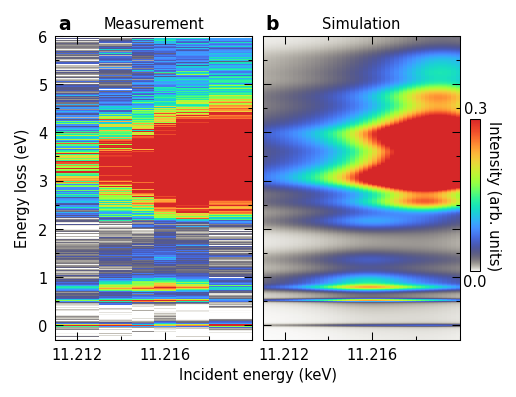

In [7]:
fig = plt.figure(figsize=(6.75/2,6.75/2/4*3), dpi=150)
gs1 = fig.add_gridspec(nrows=1, ncols=1, left=0.10, right=0.49, top=0.92, bottom=0.12) # Emap1
gs2 = fig.add_gridspec(nrows=1, ncols=1, left=0.51, right=0.90, top=0.92, bottom=0.12) # Emap2
gs3 = fig.add_gridspec(nrows=1, ncols=1, left=0.92, right=0.94, top=0.70, bottom=0.30) # colorbar
axs  = [fig.add_subplot(gs) for gs in gs1] + [fig.add_subplot(gs) for gs in gs2] # Emaps
axs += [fig.add_subplot(gs) for gs in gs3] # colorbar

## plot
_, art = plot_image(Emap_data['intensity'], x=Emap_data['omega'], y=Emap_data['eloss'],
                    ax=axs[0], cmap=turbo_w(), vmin=0., vmax=0.3)
_, art = plot_image(Emap_calc['intensity'], x=Emap_calc['omega'], y=Emap_calc['eloss'],
                    ax=axs[1], cmap=turbo_w(), vmin=0., vmax=0.3)
## colorbar
cbar = plt.colorbar(art, ax=axs[1], cax=axs[2])
format_cbar(cbar, padding=0.07)
## format
axs[1].set_xlim(axs[0].get_xlim())
for ax in axs[:2]:
    make_theme(ax, ticklength=4)
    ax.set_ylim(-0.3,6)
    ax.set_yticks(np.arange(0.,6.1,1.))
    ax.set_xticks(np.arange(11.212,11.2191,0.004))
axs[1].tick_params(labelleft=False)
axs[0].set_xlabel('Incident energy (keV)')
axs[0].xaxis.set_label_coords(1.028, -.09)
axs[0].set_ylabel('Energy loss (eV)')
plot_label(axs[0], 'a', x=0.05, y=1.04, color='k')
axs[0].text(0.5, 1.04, 'Measurement', color='k', transform=axs[0].transAxes,
            horizontalalignment='center', verticalalignment='center')
plot_label(axs[1], 'b', x=0.05, y=1.04, color='k')
axs[1].text(0.5, 1.04, 'Simulation', color='k', transform=axs[1].transAxes,
            horizontalalignment='center', verticalalignment='center')

fig.savefig('Ta_EnergyMap.pdf')

## $L$ dependence

In [8]:
for scan_no in [31,30,29,28,27,26,32,25,33,24,34,23,35,22,36,21]:
    scan = dict(np.load(f'data_Ba3TaIr2O9/scan_{scan_no}.npz'))
    print(np.average(scan['Ei']))
print(11.7745-0.559)

11.2155
11.2155
11.2155
11.2155
11.2155
11.2155
11.2155
11.2155
11.2155
11.2155
11.2155
11.2155
11.2155
11.2155
11.2155
11.2155
11.2155


In [9]:
Ldep_data = dict(eloss=None, HKL=[], intensity=[])
for scan_no in [31,30,29,28,27,26,32,25,33,24,34,23,35,22,36,21]:
    scan = dict(np.load(f'data_Ba3TaIr2O9/scan_{scan_no}.npz'))
    if Ldep_data['eloss'] is None:
        Ldep_data['eloss'] = scan['x']
    Ldep_data['HKL'].append(scan['HKL'])
    bg = np.mean(scan['y'][np.logical_and(scan['x']>=250., scan['x']<=350.)])
    Ldep_data['intensity'].append(np.interp(Ldep_data['eloss'], scan['x']-scan['xoffset'], (scan['y']-bg)/scan['ab_factor']))
Ldep_data['intensity'] = np.vstack(Ldep_data['intensity']).T
Ldep_data['HKL'] = np.vstack(Ldep_data['HKL'])
Ldep_data['eloss'] = Ldep_data['eloss'] * 1e-3

Ldep_calc = dict(np.load('calc_Ba3TaIr2O9/rixs_Ldep.npz'))
Ldep_calc['intensity'] = Ldep_calc['rixs'].T * yscale

In [10]:
d = 2.7
factor = 0.436029515 * d / (2*np.pi)

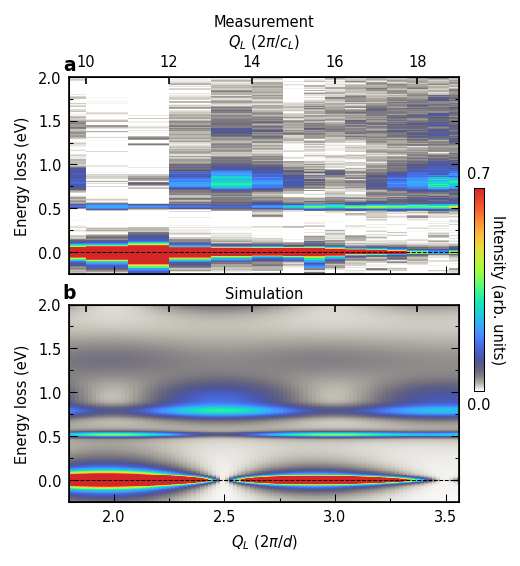

In [11]:
fig = plt.figure(figsize=(6.75/2,6.75/2), dpi=150)
gs1 = fig.add_gridspec(nrows=1, ncols=1, left=0.12, right=0.89, top=0.94, bottom=0.55) # Ldep1
gs2 = fig.add_gridspec(nrows=1, ncols=1, left=0.12, right=0.89, top=0.49, bottom=0.10) # Ldep2
gs3 = fig.add_gridspec(nrows=1, ncols=1, left=0.92, right=0.94, top=0.72, bottom=0.32)  # colorbar
axs =  [fig.add_subplot(gs) for gs in gs1] + [fig.add_subplot(gs) for gs in gs2] # Ldeps
axs += [fig.add_subplot(gs) for gs in gs3] # colorbar

_, art = plot_image(Ldep_data['intensity'], x=Ldep_data['HKL'][:,2]*factor, y=Ldep_data['eloss'],
                    ax=axs[0], cmap=turbo_w(), vmin=0., vmax=0.7)
choose = Ldep_calc['eloss']<=2.1
_, art = plot_image(Ldep_calc['intensity'][choose,:], x=Ldep_calc['Ls']*factor, y=Ldep_calc['eloss'][choose],
                    ax=axs[1], cmap=turbo_w(), vmin=0., vmax=0.7)
## colorbar
cbar = plt.colorbar(art, ax=axs[1], cax=axs[2])
format_cbar(cbar, padding=0.07)
## format
for ax in axs[:2]:
    make_theme(ax, ticklength=4)
    ax.axhline(y=0., ls='--', lw=0.5, color='k', zorder=100)
    ax.set_ylim(-0.25,2)
    ax.set_yticks(np.arange(0.,2.1,0.5))
    ax.set_xlim(9.6*factor,19*factor)
    # ax.set_xticks(np.arange(10,19.1,2.))
    ax.set_xticks(np.arange(2,4,0.5))
    ax.set_ylabel('Energy loss (eV)')
axs[0].tick_params(labelbottom=False)
# axs[1].set_xlabel('(-0.5, 0, $L$) (r.l.u.)')
# axs[1].set_xlabel('$L$ (r.l.u.)')
axs[1].set_xlabel('$Q_L$ ($2\pi/d$)')
plot_label(axs[0], 'a', x=0.0, y=1.06, color='k')
axs[0].set_title('Measurement', fontsize=7, pad=3)
plot_label(axs[1], 'b', x=0.0, y=1.06, color='k')
axs[1].set_title('Simulation', fontsize=7, pad=3)
axs_top = axs[0].twiny()
axs_top.set_xlim(9.6,19)
axs_top.set_xlabel('$Q_L$ ($2\pi/c_L$)')
axs_top.tick_params(direction='in')
axs_top = axs[1].twiny()
axs_top.set_xlim(9.6,19)
axs_top.tick_params(direction='in',labeltop=False)

fig.savefig('Ta_Lmap.pdf', bbox_inches='tight')